# Anime-Or-Not

## library import

In [28]:
import kagglehub
import os

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import cv2
import random


## download images

In [ ]:
# download latest version data

path = kagglehub.dataset_download("kanakmittal/anime-and-cartoon-image-classification")
print("Path to dataset files:", path)

# then copy the files to the desired location --> ./data/

Path to dataset files: C:\Users\ahnaf\.cache\kagglehub\datasets\kanakmittal\anime-and-cartoon-image-classification\versions\1


## load images

In [15]:
# lets read all the images
anime_path = r'../data/Training Data/Anime/'

X = []
y = []

# The label for Anime is 0 and for Cartoon, it is 1

for folder in os.scandir(anime_path):
    for file in os.scandir(anime_path + folder.name):
        img = cv2.imread(anime_path + folder.name + '/' + file.name, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128, 128))
        img = np.array(img, dtype='float32')
        img/=255
        X.append(img)
        y.append(0)

In [16]:
print("Number of Images of Anime = ", len(X))

Number of Images of Anime =  4447


In [19]:
cartoon_path = r'../data/Training Data/Cartoon/'

for folder in os.scandir(cartoon_path):
    for file in os.scandir(cartoon_path + folder.name):
        img = cv2.imread(cartoon_path + folder.name + '/' + file.name, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128, 128))
        img = np.array(img, dtype='float32')
        img/=255
        X.append(img)
        y.append(1)

In [20]:
print("Number of Images of Cartoon = ", len(X)-4447)

Number of Images of Cartoon =  4445


In [21]:
# converting the images to a numpy array for easy processing
X = np.array(X)
y = np.array(y)

In [22]:
# shape of the image currently
X.shape

(8892, 128, 128, 3)

- 8892: The number of images in the dataset.
- 128: The height of each image (128 pixels).
- 128: The width of each image (128 pixels).
- 3: The number of color channels in each image (3 channels for RGB).

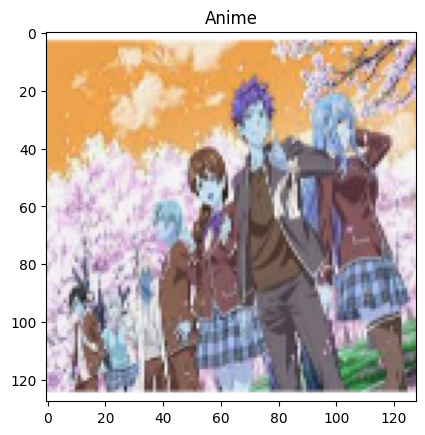

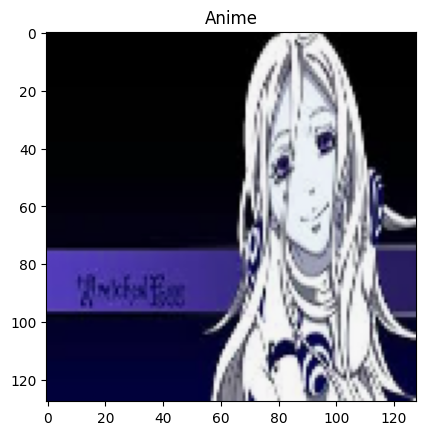

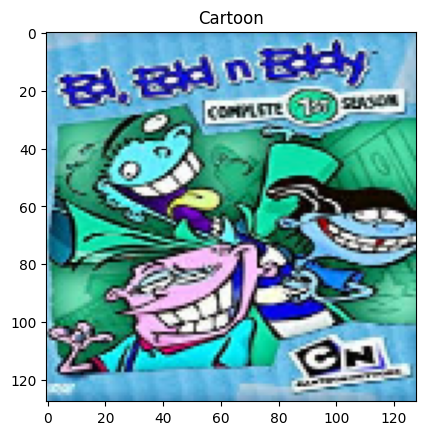

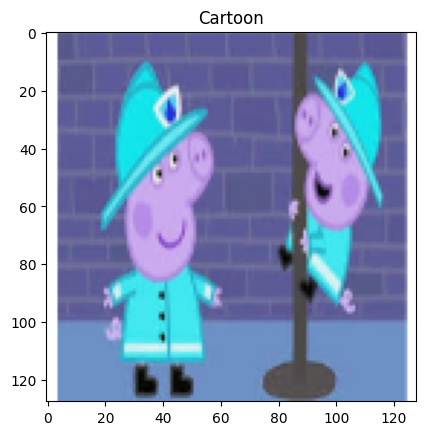

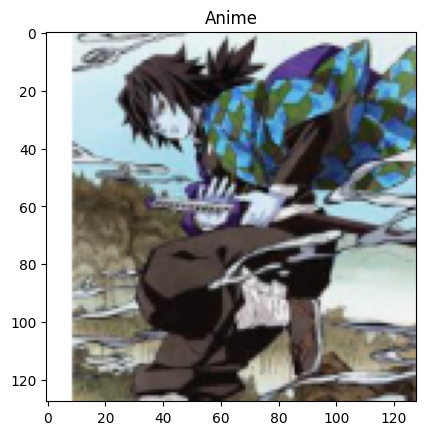

In [23]:
# lets plot 5 random images

labels = {0:'Anime', 1:'Cartoon'}

for i in range(5):
    n = random.randint(0, 9148)
    plt.figure()
    plt.title(labels[y[n]])
    plt.imshow(X[n])

## train-test split

> 80:10:10 ratio for train-validation-test.

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val)

In [30]:
print("Training data samples = ", len(y_train))
print("Testing and Validating data samples = ", len(y_test), " (each)")

Training data samples =  7113
Testing and Validating data samples =  890  (each)


## model